# Guia da Camada de Enlace
### IMPORTANDO AS DEPENDÊNCIAS
##### O documento tem o objetivo de demostrar o funcionamento da camada de enlace, além de suas funções e ferramentas

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
Logger.activate(Logger)

##### Instanciando a rede, e setando a topologia.

2024-09-05 23:28:51,555: Qubit 0 adicionado à memória do Host 0.
2024-09-05 23:28:51,556: Qubit 0 criado com fidelidade inicial 0.4183858240370638 e adicionado à memória do Host 0.
2024-09-05 23:28:51,556: Qubit 1 adicionado à memória do Host 0.
2024-09-05 23:28:51,557: Qubit 1 criado com fidelidade inicial 0.48400708898158507 e adicionado à memória do Host 0.
2024-09-05 23:28:51,557: Qubit 2 adicionado à memória do Host 0.
2024-09-05 23:28:51,557: Qubit 2 criado com fidelidade inicial 0.5179535305106496 e adicionado à memória do Host 0.
2024-09-05 23:28:51,558: Qubit 3 adicionado à memória do Host 0.
2024-09-05 23:28:51,558: Qubit 3 criado com fidelidade inicial 0.7464286788587611 e adicionado à memória do Host 0.
2024-09-05 23:28:51,559: Qubit 4 adicionado à memória do Host 0.
2024-09-05 23:28:51,559: Qubit 4 criado com fidelidade inicial 0.6419954442248653 e adicionado à memória do Host 0.
2024-09-05 23:28:51,559: Qubit 5 adicionado à memória do Host 0.
2024-09-05 23:28:51,560: Qubi

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


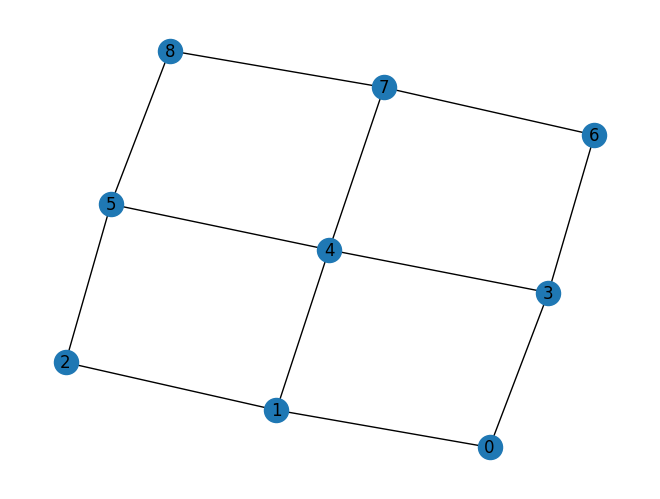

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

##### Definindo os hosts alice e bob nos nós 1 e 2 respectivamente, e definindo os qubits que serão enviados

In [3]:
alice = rede.get_host(1)
bob = rede.get_host(2)
qubit1 = Qubit(1)
qubit2 = Qubit(2)


##### Enviando um request para o servidor, se a fidelidade dos qubits for maior que 0.5, o servidor aceita a conexão e envia a chave para o cliente, se não, é tentado novamente fazer o entrelaçamento, e se falhar novamente, o servidor tenta purificar.

In [16]:
rede.linklayer.request(1,2)

2024-09-05 23:28:56,491: Timeslot 15: Par epr criado com fidelidade 0.3913490142942992
2024-09-05 23:28:56,492: Timeslot 16: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.
2024-09-05 23:28:56,492: Timeslot 11: Entrelaçamento falhou entre 1 e 2 na tentativa 1.
2024-09-05 23:28:56,492: Timeslot 17: Par epr criado com fidelidade 0.07783251567681967
2024-09-05 23:28:56,493: Timeslot 18: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.
2024-09-05 23:28:56,493: Timeslot 12: Entrelaçamento falhou entre 1 e 2 na tentativa 2.
2024-09-05 23:28:56,493: A purificação utilizada foi tipo 1.
2024-09-05 23:28:56,494: Timeslot 13: Purificação falhou no canal (1, 2) devido a baixa fidelidade após purificação.


False

##### Verificando o canal do canal

In [17]:
rede.linklayer.avg_fidelity_on_linklayer()

2024-09-05 23:28:57,873: A fidelidade média dos EPRs criados na camada de enlace é 0.24248127882072198


Total de EPRs criados na camada de enlace: 9
Total de fidelidade dos EPRs criados na camada de enlace: 2.182331509386498


0.24248127882072198

In [6]:
rede.get_total_useds_eprs()

2024-09-05 23:28:52,264: Eprs usados na camada PhysicalLayer: 2
2024-09-05 23:28:52,265: Eprs usados na camada LinkLayer: 2
2024-09-05 23:28:52,265: Eprs usados na camada NetworkLayer: 0


4

In [7]:
rede.get_total_useds_qubits()

2024-09-05 23:28:52,272: Qubits usados na camada PhysicalLayer: 4
2024-09-05 23:28:52,273: Qubits usados na camada LinkLayer: 0
2024-09-05 23:28:52,273: Qubits usados na camada TransportLayer: 0
2024-09-05 23:28:52,274: Qubits usados na camada ApplicationLayer: 0


4

In [8]:
rede.get_eprs_from_edge(1,2)

##### Verificando todos os canais

In [9]:
rede.get_eprs()

{(0, 3): [<quantumnet.objects.epr.Epr at 0x1cc7e407380>,
 (0, 1): [<quantumnet.objects.epr.Epr at 0x1cc7e54f290>,
 (1, 4): [<quantumnet.objects.epr.Epr at 0x1cc7dfcfe60>,
 (1, 2): [<quantumnet.objects.epr.Epr at 0x1cc7e521f70>,
 (2, 5): [<quantumnet.objects.epr.Epr at 0x1cc7e520fb0>,
 (3, 6): [<quantumnet.objects.epr.Epr at 0x1cc7e561520>,
 (3, 4): [<quantumnet.objects.epr.Epr at 0x1cc7e521c10>,
 (4, 7): [<quantumnet.objects.epr.Epr at 0x1cc7e5221e0>,
 (4, 5): [<quantumnet.objects.epr.Epr at 0x1cc7e562510>,
 (5, 8): [<quantumnet.objects.epr.Epr at 0x1cc7e522a20>,
 (6, 7): [<quantumnet.objects.epr.Epr at 0x1cc7e563290>,
 (7, 8): [<quantumnet.objects.epr.Epr at 0x1cc7e523aa0>,
  <quantumnet.objects.epr.Epr at 0x1cc7e563f80>]}

In [10]:
rede.linklayer.timeslot

3

In [11]:
rede.get_total_timeslot()

2024-09-05 23:28:52,311: Timeslot atual na camada PhysicalLayer: 4
2024-09-05 23:28:52,312: Timeslot atual na camada LinkLayer: 3
2024-09-05 23:28:52,312: Timeslot atual na camada NetworkLayer: 0
2024-09-05 23:28:52,313: Timeslot atual na camada TransportLayer: 0


7

In [12]:
rede.total_qubits_on_simulation()

AttributeError: 'Network' object has no attribute 'total_qubits_on_simulation'

In [ ]:
rede.linklayer.avg_fidelity_on_linklayer()